# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import urllib
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

base_url = f"{url}appid={weather_api_key}&units={units}&q="

clouds = []
winds = []
temp = []
humidity = []
country = []
lat = []
lng = []
city_list = []
date = []


print("Beginning Data Retrieval     ")
print("-----------------------------")
record_count = 1
set_count = 1

for city in cities:
    
    if record_count > 10:
        record_count = 1
        set_count += 1
        
    else:
        record_count += 1
        
    try:
        city_url = f'{base_url}{city.replace(" ", "+")}'
        response = requests.get(city_url)
        print(f"Processing Record Number {record_count} of Set Number {set_count} | City of {city}")  
        print(city_url)
    
        data = response.json()
        time.sleep(1)
        clouds.append(data["clouds"]["all"])
        winds.append(data["wind"]["speed"])
        temp.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        country.append(data["sys"]["country"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        date.append(data["dt"])
        city_list.append(city)
    
    except:
        print("City not found. Onto the next one...")
        
print("------------Data Retrieval Complete.------------")
    

Beginning Data Retrieval     
-----------------------------
Processing Record Number 2 of Set Number 1 | City of butaritari
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=butaritari
Processing Record Number 3 of Set Number 1 | City of preobrazheniye
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=preobrazheniye
Processing Record Number 4 of Set Number 1 | City of avarua
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=avarua
Processing Record Number 5 of Set Number 1 | City of kahului
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=kahului
Processing Record Number 6 of Set Number 1 | City of attawapiskat
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=attawapiskat
City not found. Onto the next one...
Processing Record Number 

City not found. Onto the next one...
Processing Record Number 5 of Set Number 5 | City of manokwari
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=manokwari
Processing Record Number 6 of Set Number 5 | City of malkapur
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=malkapur
Processing Record Number 7 of Set Number 5 | City of grindavik
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=grindavik
Processing Record Number 8 of Set Number 5 | City of beira
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=beira
Processing Record Number 9 of Set Number 5 | City of hailey
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=hailey
Processing Record Number 10 of Set Number 5 | City of bokoro
http://api.openweathermap.org/data/2.5/weather?a

City not found. Onto the next one...
Processing Record Number 9 of Set Number 9 | City of uvalde
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=uvalde
Processing Record Number 10 of Set Number 9 | City of halifax
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=halifax
Processing Record Number 11 of Set Number 9 | City of severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=severo-kurilsk
Processing Record Number 1 of Set Number 10 | City of giyani
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=giyani
Processing Record Number 2 of Set Number 10 | City of quatre cocos
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=quatre+cocos
Processing Record Number 3 of Set Number 10 | City of belushya guba
http://api.openweathe

Processing Record Number 11 of Set Number 13 | City of tiarei
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=tiarei
Processing Record Number 1 of Set Number 14 | City of mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=mys+shmidta
City not found. Onto the next one...
Processing Record Number 2 of Set Number 14 | City of cravo norte
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=cravo+norte
Processing Record Number 3 of Set Number 14 | City of cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=cabo+san+lucas
Processing Record Number 4 of Set Number 14 | City of bontang
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=bontang
Processing Record Number 5 of Set Number 14 | City of palmer
http://api.openwea

Processing Record Number 3 of Set Number 18 | City of bethel
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=bethel
Processing Record Number 4 of Set Number 18 | City of lumajang
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=lumajang
Processing Record Number 5 of Set Number 18 | City of saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=saint-philippe
Processing Record Number 6 of Set Number 18 | City of norman wells
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=norman+wells
Processing Record Number 7 of Set Number 18 | City of sao miguel do araguaia
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=sao+miguel+do+araguaia
Processing Record Number 8 of Set Number 18 | City of vanimo
http://api.openweathermap.org/

Processing Record Number 5 of Set Number 22 | City of teya
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=teya
City not found. Onto the next one...
Processing Record Number 7 of Set Number 22 | City of bilma
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=bilma
Processing Record Number 8 of Set Number 22 | City of agirish
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=agirish
Processing Record Number 9 of Set Number 22 | City of saint-denis
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=saint-denis
Processing Record Number 10 of Set Number 22 | City of marsh harbour
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=marsh+harbour
Processing Record Number 11 of Set Number 22 | City of huntsville
http://api.openweathermap.org/d

Processing Record Number 10 of Set Number 26 | City of anadyr
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=anadyr
Processing Record Number 11 of Set Number 26 | City of awjilah
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=awjilah
Processing Record Number 1 of Set Number 27 | City of bengkulu
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=bengkulu
Processing Record Number 2 of Set Number 27 | City of chapais
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=chapais
Processing Record Number 3 of Set Number 27 | City of kaele
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=kaele
Processing Record Number 4 of Set Number 27 | City of laguna
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&

Processing Record Number 2 of Set Number 31 | City of kiama
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=kiama
Processing Record Number 3 of Set Number 31 | City of markova
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=markova
Processing Record Number 4 of Set Number 31 | City of karaul
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=karaul
City not found. Onto the next one...
Processing Record Number 5 of Set Number 31 | City of iwanai
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=iwanai
Processing Record Number 6 of Set Number 31 | City of cuamba
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=cuamba
Processing Record Number 7 of Set Number 31 | City of kaohsiung
http://api.openweathermap.org/data/2.5/weather?appid=a

Processing Record Number 4 of Set Number 35 | City of mangrol
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=mangrol
Processing Record Number 5 of Set Number 35 | City of ornskoldsvik
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=ornskoldsvik
Processing Record Number 6 of Set Number 35 | City of chenzhou
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=chenzhou
Processing Record Number 7 of Set Number 35 | City of yirol
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=yirol
City not found. Onto the next one...
Processing Record Number 8 of Set Number 35 | City of marienburg
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=marienburg
Processing Record Number 9 of Set Number 35 | City of saint george
http://api.openweathermap.o

Processing Record Number 7 of Set Number 39 | City of kunming
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=kunming
Processing Record Number 8 of Set Number 39 | City of shelopugino
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=shelopugino
Processing Record Number 9 of Set Number 39 | City of leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=leningradskiy
Processing Record Number 10 of Set Number 39 | City of charlestown
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=charlestown
Processing Record Number 11 of Set Number 39 | City of luang prabang
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=luang+prabang
Processing Record Number 1 of Set Number 40 | City of kijang
http://api.openweathermap.org/data/2.5/wea

Processing Record Number 10 of Set Number 43 | City of taungdwingyi
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=taungdwingyi
Processing Record Number 11 of Set Number 43 | City of riyadh
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=riyadh
Processing Record Number 1 of Set Number 44 | City of alofi
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=alofi
Processing Record Number 2 of Set Number 44 | City of maumere
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=maumere
Processing Record Number 3 of Set Number 44 | City of camabatela
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=camabatela
Processing Record Number 4 of Set Number 44 | City of evora
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f

Processing Record Number 2 of Set Number 48 | City of tongren
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=tongren
Processing Record Number 3 of Set Number 48 | City of emerald
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=emerald
Processing Record Number 4 of Set Number 48 | City of changli
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=changli
Processing Record Number 5 of Set Number 48 | City of kieta
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=kieta
Processing Record Number 6 of Set Number 48 | City of saurimo
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=saurimo
Processing Record Number 7 of Set Number 48 | City of tacoronte
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3

Processing Record Number 4 of Set Number 52 | City of muriti
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=muriti
Processing Record Number 5 of Set Number 52 | City of muscat
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=muscat
Processing Record Number 6 of Set Number 52 | City of parker
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=parker
Processing Record Number 7 of Set Number 52 | City of chokwe
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=chokwe
Processing Record Number 8 of Set Number 52 | City of mizdah
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=mizdah
Processing Record Number 9 of Set Number 52 | City of lubango
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=m

Processing Record Number 7 of Set Number 56 | City of tiznit
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=tiznit
Processing Record Number 8 of Set Number 56 | City of goudomp
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=goudomp
City not found. Onto the next one...
Processing Record Number 9 of Set Number 56 | City of syedove
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=syedove
Processing Record Number 10 of Set Number 56 | City of elat
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=elat
Processing Record Number 11 of Set Number 56 | City of eureka
http://api.openweathermap.org/data/2.5/weather?appid=af63661253f7cf253a9f7e89034bfaa3&units=metric&q=eureka
Processing Record Number 1 of Set Number 57 | City of camacha
http://api.openweathermap.org/data/2.5/weather?appid=a

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cityData_pd = pd.DataFrame(cities)
cityData_pd.count()

0    622
dtype: int64

In [22]:
weatherpy = {"City": city_list, "Country": country, "Date": date, "Lat": lat, "Long": lng, "Max Temp": temp, "Humidity": humidity, "Cloudiness": clouds, "Wind Speed": winds}

weatherpy_df = pd.DataFrame(weatherpy)

weatherpy_df.head()

,City,Country,Date,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed
0,butaritari,KI,1630968624,3.0707,172.7902,28.88,71,100,5.87
1,preobrazheniye,RU,1630968626,42.9019,133.9064,18.66,77,100,2.87
2,avarua,CK,1630968631,-21.2078,-159.7750,25.03,69,75,8.23
3,kahului,US,1630968464,20.8947,-156.4700,30.01,58,40,9.26
4,rawson,AR,1630968638,-43.3002,-65.1023,13.42,64,97,2.49


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [ ]:
lats = cleanCity_data["Lat"]
maxTemps = cleanCity_data["Max Temp"]
humidity = cleanCity_data["Humidity"]
cloudiness = cleanCity_data["Cloudiness"]
wind_speed = cleanCity_data["Wind Speed"]

cleanCity_data.to_csv(output_data_file, index_label="City_ID")

## Latitude vs. Temperature Plot

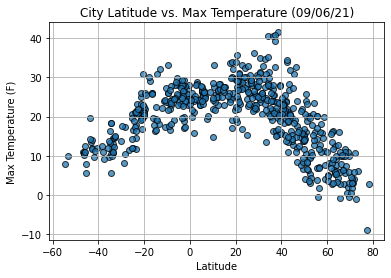

In [18]:
plt.scatter(weatherpy_df['Lat'], weatherpy_df['Max Temp'], alpha = 0.75, edgecolors = 'black', linewidths = 1, marker = "o")

plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Max Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(close=None, block=None)>

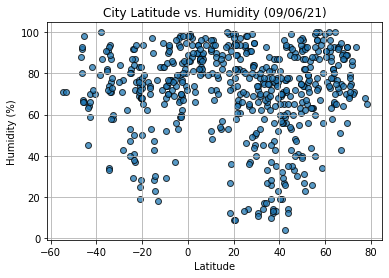

In [20]:
plt.scatter(weatherpy_df['Lat'], weatherpy_df['Humidity'], alpha = 0.75, edgecolors = 'black', linewidths = 1, marker = "o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime ("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Humidity.png")
plt.show

## Latitude vs. Cloudiness Plot

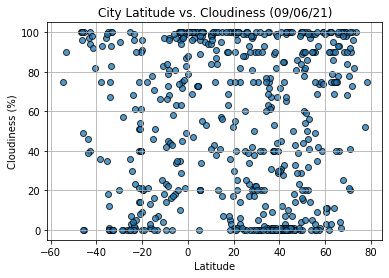

In [24]:
plt.scatter(weatherpy_df['Lat'], weatherpy_df['Cloudiness'], alpha = 0.75, edgecolors = 'black', linewidths = 1, marker = "o")

plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime ("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(close=None, block=None)>

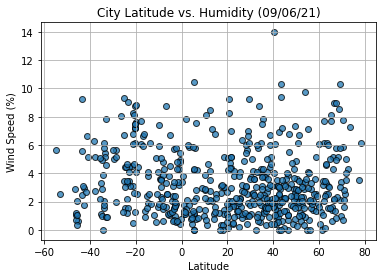

In [25]:
plt.scatter(weatherpy_df['Lat'], weatherpy_df['Wind Speed'], alpha = 0.75, edgecolors = 'black', linewidths = 1, marker = "o")

plt.title("City Latitude vs. Humidity (%s)" % time.strftime ("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("City Latitude vs. Wind Speed.png")
plt.show

## Linear Regression

In [27]:
northern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"]>=0)]
southern_hemisphere = weatherpy_df.loc[(weatherpy_df["Lat"]<=0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

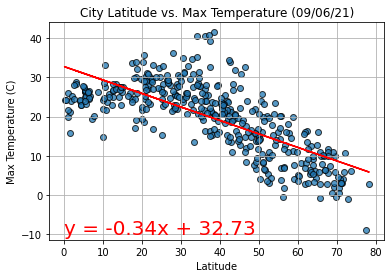

In [30]:
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Max Temp'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.grid(True)

x = northern_hemisphere['Lat']
y = northern_hemisphere['Max Temp'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(0, -10), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Max Temperature - Nothern Hemisphere.png")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

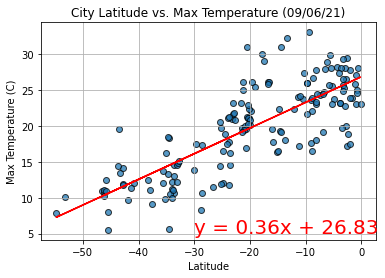

In [31]:
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Max Temp'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Max Temperature (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Max Temperature (C)')
plt.grid(True)

x = southern_hemisphere['Lat']
y = southern_hemisphere['Max Temp'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(-30, 5), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Max Temperature - Southern Hemisphere.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

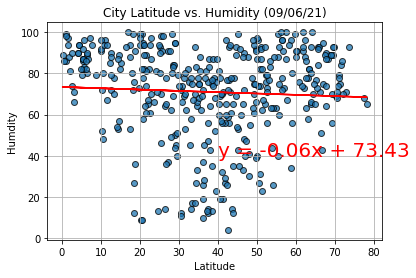

In [32]:
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Humidity'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)

x = northern_hemisphere['Lat']
y = northern_hemisphere['Humidity'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(40, 40), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Humidity - Nothern Hemisphere.png")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

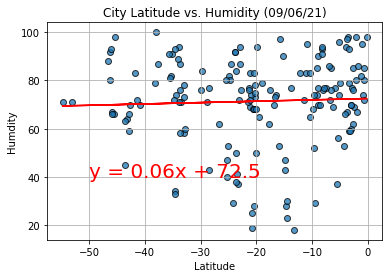

In [33]:
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Humidity'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Humidity (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)

x = southern_hemisphere['Lat']
y = southern_hemisphere['Humidity'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(-50, 40), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Humidity - Southern Hemisphere.png")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

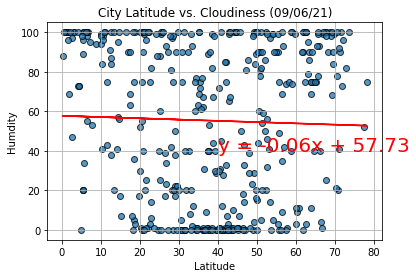

In [34]:
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Cloudiness'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)

x = northern_hemisphere['Lat']
y = northern_hemisphere['Cloudiness'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(40, 40), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Cloudiness - Nothern Hemisphere.png")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

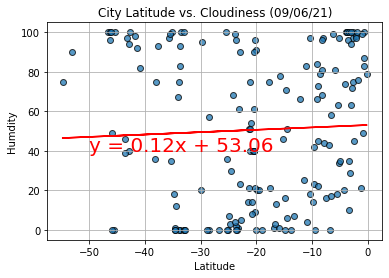

In [35]:
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Cloudiness'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Cloudiness (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Humdity')
plt.grid(True)

x = southern_hemisphere['Lat']
y = southern_hemisphere['Cloudiness'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(-50, 40), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Cloudiness - Southern Hemisphere.png")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
plt.scatter(northern_hemisphere['Lat'], northern_hemisphere['Wind Speed'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)

x = northern_hemisphere['Lat']
y = northern_hemisphere['Wind Speed'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(0, 12), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Wind Speed - Nothern Hemisphere.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

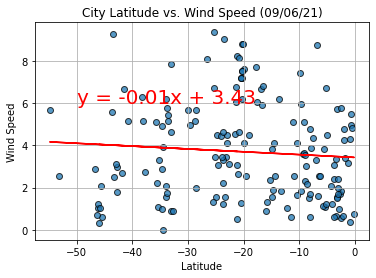

In [36]:
plt.scatter(southern_hemisphere['Lat'], southern_hemisphere['Wind Speed'], alpha = 0.75, edgecolors = 'black', linewidths=1, marker="o",)

plt.title('City Latitude vs. Wind Speed (%s)' % time.strftime('%x'))
plt.xlabel('Latitude') 
plt.ylabel('Wind Speed')
plt.grid(True)

x = southern_hemisphere['Lat']
y = southern_hemisphere['Wind Speed'] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)

regress_value = x * slope + intercept 
analysis = (f"y = {str(round(slope, 2))}x + {str(round(intercept, 2))}")

plt.plot(x, regress_value, "r-")
plt.annotate(analysis,(-50, 6), color = "red", fontsize = 20)
plt.savefig("Linear Regreesion of City Latitude vs. Wind Speed - Southern Hemisphere.png")

plt.show()

In [37]:
weatherpy_df.to_csv("../cities_weather.csv")